## Data preprocessing

Oscar Hernández Terán

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
plt.style.use('seaborn')

In [2]:
# We load the data and storage in a DataFrame.
route = '../Files/Data/House_Price.csv'
df = pd.read_csv(route)
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [3]:
# Shape of the data.
print('Number of rows: \n\t\t', df.shape[0])
print('Number of cols: \n\t\t ', df.shape[1])

Number of rows: 
		 506
Number of cols: 
		  19


In [4]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


### First data inspection
1. Empty values 'in n_hos_beds' 
2. Outliers in 'crime_rate'
3. Outliers in 'n_hot_rooms'
4. Outliers in 'rainfall'

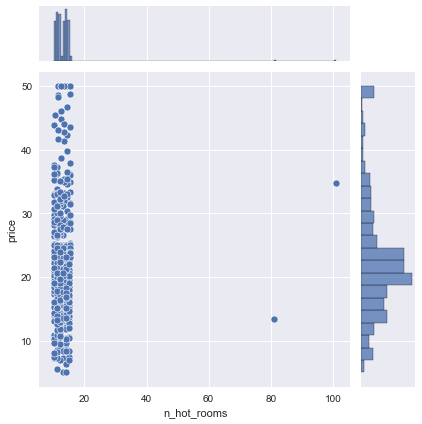

In [5]:
# We begin the clean.
sns.jointplot(x='n_hot_rooms', y='price', data=df)
plt.show()

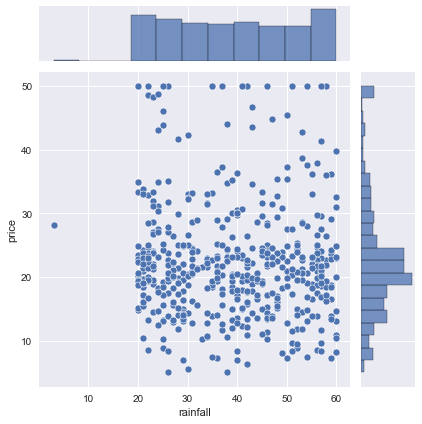

In [6]:
sns.jointplot(x='rainfall', y='price', data=df)
plt.show()

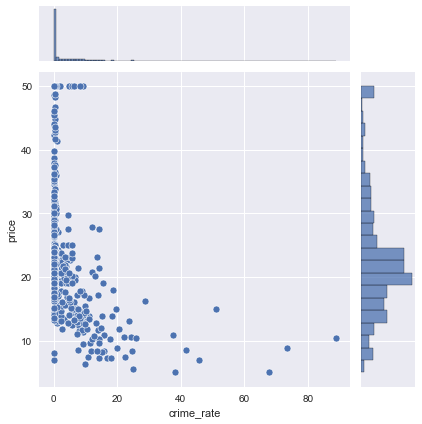

In [7]:
sns.jointplot(x='crime_rate', y='price', data=df)
plt.show()

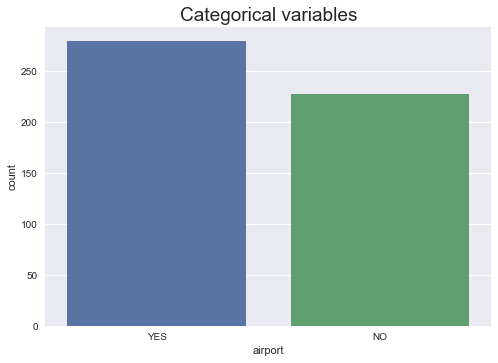

In [8]:
# We review the distribution of the categorical variables.
sns.countplot(x='airport', data=df)
plt.title('Categorical variables', fontsize=19)
plt.show()

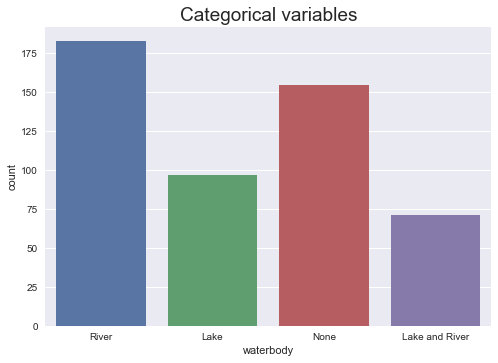

In [9]:
sns.countplot(x='waterbody', data=df)
plt.title('Categorical variables', fontsize=19)
plt.show()

In [10]:
# We check the main information of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

                         Treatment of outliers                         


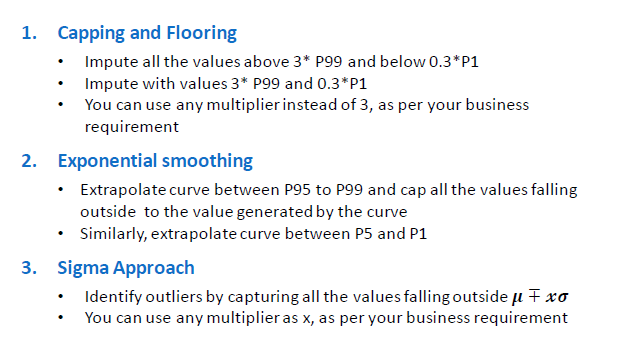

In [11]:
txt = 'Treatment of outliers'
s = txt.center(71)
print(s) 
Image('../Figures/Outliers.PNG', width=500)

In [12]:
# We use the first method.

# Here check the value of the 99 percentile.
lim = np.percentile(df.n_hot_rooms,[99])[0]
print(lim)

15.39952


In [13]:
# Here we check the indexes of the values that do not meet the limit.
df[(df.n_hot_rooms > lim)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [14]:
df.n_hot_rooms[(df.n_hot_rooms> 3*lim)] = 3*lim
df[(df.n_hot_rooms > lim)]

<ipython-input-14-db9a5e44b99a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms> 3*lim)] = 3*lim


,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


In [15]:
'''
For this case, we will use the third approach 
in which we define outlier as a value greater or 
less than the mean plus or minus 3 standard deviations.
'''
med = np.mean(df['crime_rate'])
std = np.std(df['crime_rate'])
print('The mean and the standar desviation is: \n \t', med, '\t', std)

The mean and the standar desviation is: 
 	 3.6135235573122535 	 8.593041351295769


In [16]:
# We check the outliers.
lim_s = med + 3*std
print('The lim is: \n\t', lim_s)

df[(df.crime_rate > lim_s)]

The lim is: 
	 29.39264761119956


,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
380,10.4,88.9762,48.1,0.671,6.968,91.9,1.66,1.14,1.69,1.18,19.8,17.21,YES,9.408,14.0832,None,21,YES,0.066591
398,5.0,38.3518,48.1,0.693,5.453,100.0,1.57,1.26,1.79,1.34,19.8,30.59,NO,9.300,13.0400,Lake,26,YES,0.065253
404,8.5,41.5292,48.1,0.693,5.531,85.4,1.90,1.56,1.63,1.34,19.8,27.38,NO,8.470,11.0680,None,56,YES,0.061470
405,5.0,67.9208,48.1,0.693,5.683,100.0,1.53,1.19,1.44,1.54,19.8,22.98,YES,7.300,14.0400,River,38,YES,0.065308
410,15.0,51.1358,48.1,0.597,5.757,100.0,1.69,1.32,1.58,1.06,19.8,10.11,NO,9.600,11.1200,River,52,YES,0.061616
414,7.0,45.7461,48.1,0.693,4.519,100.0,1.74,1.50,1.90,1.49,19.8,36.98,YES,6.040,12.0560,River,40,YES,0.069263
418,8.8,73.5341,48.1,0.679,5.957,100.0,1.96,1.69,1.85,1.70,19.8,20.62,NO,8.476,12.0704,None,52,YES,0.067904
427,10.9,37.6619,48.1,0.679,6.202,78.7,2.07,1.66,2.12,1.60,19.8,14.52,NO,7.518,11.0872,Lake,42,YES,0.066287


<ipython-input-17-b75d09fe0b1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.crime_rate[(df.crime_rate > lim_s)] = med


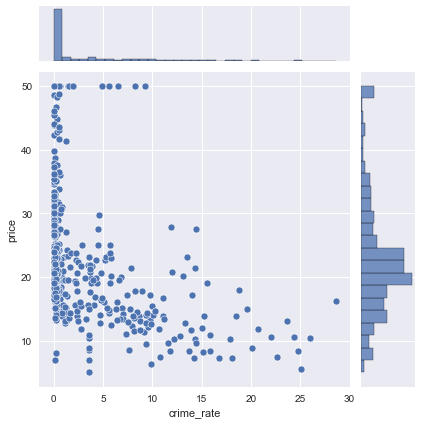

In [17]:
df.crime_rate[(df.crime_rate > lim_s)] = med

# We can plot the values again and check.
sns.jointplot(x='crime_rate', y='price', data=df)
plt.show()

In [18]:
'''
In the case of the rainfall column, 
it is known that the outliers are unique and represent the minimum and maximun values of the entire column.
'''
medr = np.mean(df['rainfall'])
stdr = np.std(df['rainfall'])
df.rainfall[(df.rainfall == np.min(df.rainfall))] = medr
df.rainfall[(df.rainfall == np.max(df.rainfall))] = medr 

<ipython-input-18-75d066875547>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall == np.min(df.rainfall))] = medr


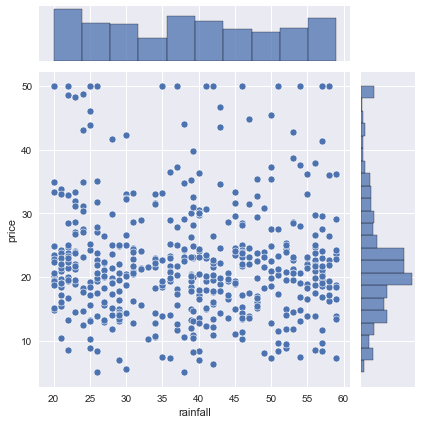

In [19]:
sns.jointplot(x='rainfall', y='price', data=df)
plt.show()

### Missing value imputation

To run artificial intelligence or machine learning models we must be sure that there are no empty values in our dataset.

There are different ways to correct this.

1. Cut the row information in case the dataset is large and the empty values are few.
2. We can replace te empty value for values as mean or median.

In [20]:
# We can check for the existence of at least one empty value.
print('Values empty'.center(30, ' '))
print('There are',df.isnull().values.sum(), 'empty values \n\n')

# Use df.info() for check where is the empty values.
df.info()

         Values empty         
There are 8 empty values 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    float64
 17  bus_ter      506 non-null    obje

In [21]:
# We fill in the missing values with the average of the whole column.
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    float64
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

                        Types of transformation                        


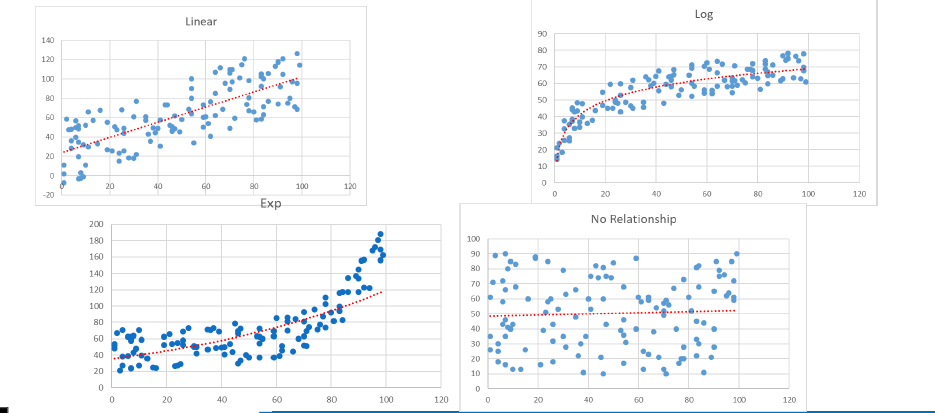

In [22]:
txt = 'Types of transformation'
s = txt.center(71)
print(s) 
Image('../Figures/Transform.PNG', width=900)

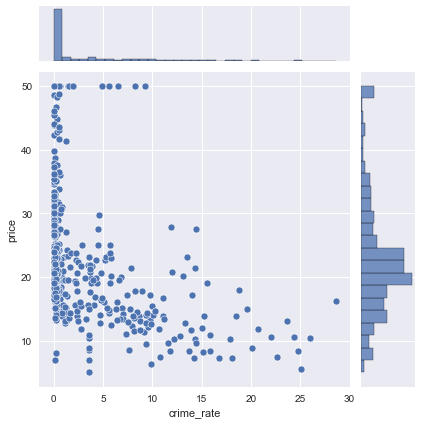

In [23]:
# We can use log-transfomation for 'crime_rate' variable.
sns.jointplot(x='crime_rate', y='price', data=df)
plt.show()

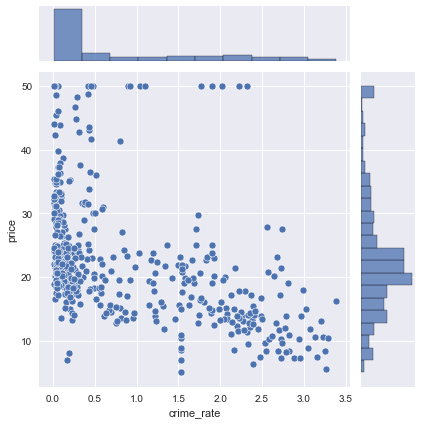

In [24]:
# Log transformation.
df.crime_rate = np.log(1+df.crime_rate)
sns.jointplot(x='crime_rate', y='price', data=df)
plt.show()

In [25]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.774509,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,38.759612,0.054454,3.795104
std,9.182176,0.944091,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,11.980115,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,20.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.090909,0.053507,3.207500
75%,25.000000,1.528992,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,49.000000,0.061397,5.187500
max,50.000000,3.389658,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,59.000000,0.086711,12.127500


In [26]:
# We delete the 'dist*' columns.
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']
del df['bus_ter']
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.774509,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,38.759612,0.054454,3.795104
std,9.182176,0.944091,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,11.980115,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,20.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.090909,0.053507,3.207500
75%,25.000000,1.528992,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,49.000000,0.061397,5.187500
max,50.000000,3.389658,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,59.000000,0.086711,12.127500


In [27]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23.0,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42.0,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38.0,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45.0,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55.0,0.039474,6.0625


In [28]:
# We convert the categorical variables to numerical variables.
df = pd.get_dummies(df)
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23.0,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42.0,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38.0,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45.0,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55.0,0.039474,6.0625,1,0,1,0,0,0


In [29]:
# To convert the variables we need n-1 columns, where n are the levels of the variable.
# Delete one column of those that were created
del df['airport_NO']
del df['waterbody_None']

In [30]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23.0,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42.0,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38.0,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45.0,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55.0,0.039474,6.0625,0,1,0,0


                        Types of transformation                        


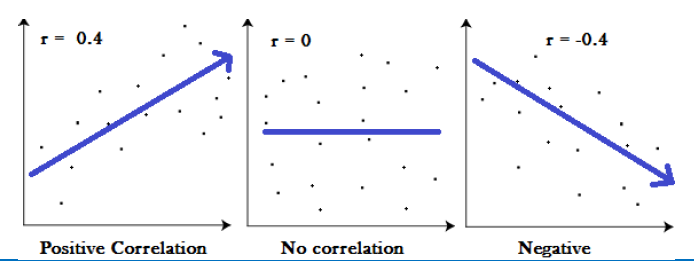

In [31]:
txt = 'Types of transformation'
s = txt.center(71)
print(s) 
Image('../Figures/Correlation.PNG', width=600)

In [32]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.443873,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.038810,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.443873,1.000000,0.673369,0.723880,-0.284453,0.567686,-0.389268,0.604206,-0.015503,0.068222,0.068042,0.649096,-0.591729,-0.133616,-0.030141,0.026499,-0.066519
resid_area,-0.484754,0.673369,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.056064,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.723880,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.083769,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.284453,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.068067,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.567686,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.054068,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.389268,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.059985,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.604206,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.047660,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.015503,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.056030,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.068222,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.006746,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


[]

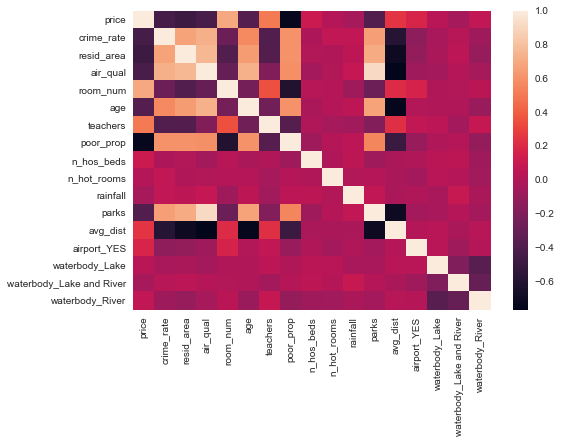

In [33]:
sns.heatmap(df.corr())
plt.plot()

In [34]:
# It is possible to generate a set of scatter plots for each
# relationship between the variables and observe the correlation between them.

#sns.pairplot(data=df)
#plt.plot()